<a href="https://colab.research.google.com/github/guptaprateek98/capstone_bike_sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(prateek).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [326]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [328]:
ds = pd.read_csv('/content/drive/MyDrive/capstone for bike sharing/SeoulBikeData.csv',encoding='ISO-8859-1')

#Looking into dataset

In [329]:
ds.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [330]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [331]:
ds.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [332]:
ds.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#Checking for duplicacy

In [333]:
len(ds[ds.duplicated()])

0

In [334]:
#checking for null values
ds.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#Feature engineering part-1

In [335]:
from datetime import datetime


In [336]:
ds['Date']=ds['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

In [337]:
ds['month'] = ds['Date'].apply(lambda x : x.month)
ds['day_of_week'] = ds['Date'].dt.day_name()
ds['weekdays_weekend']=ds['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
ds=ds.drop(columns=['Date','day_of_week'],axis=1)

In [338]:
ds.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [339]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

##PERFORMING EDA

###Univariate analysis

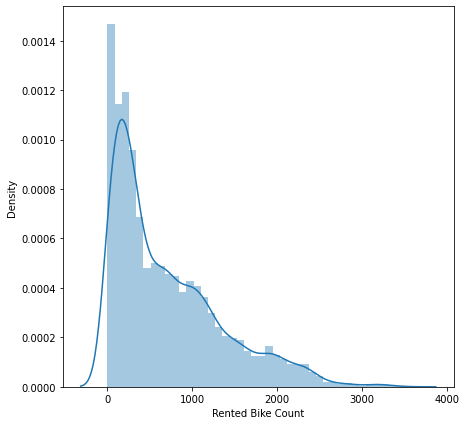

In [340]:
plt.figure(figsize=(7,7))
sns.distplot(ds['Rented Bike Count'])

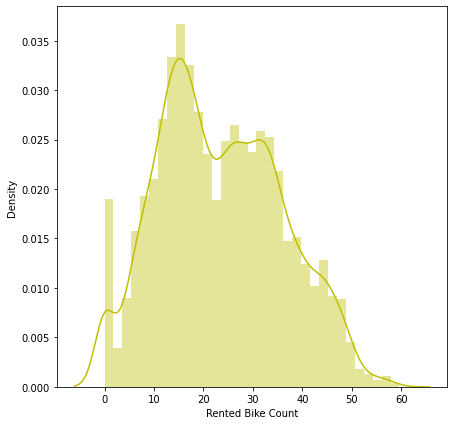

In [341]:
#sqrt transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(ds['Rented Bike Count']),color="y")

#Visual representation of numeric features

In [342]:
numeric_features = ds.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

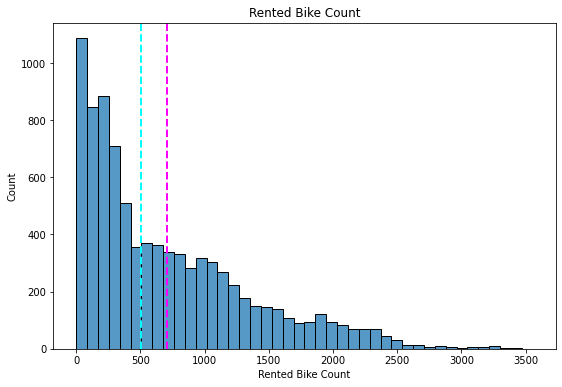

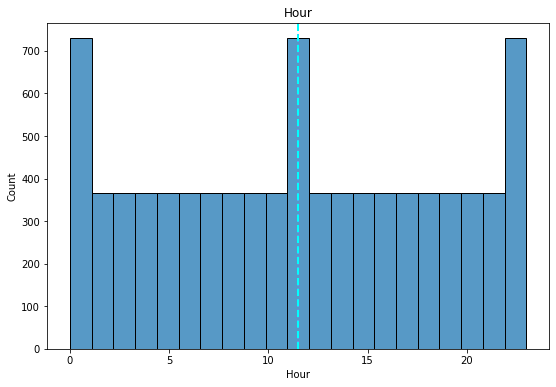

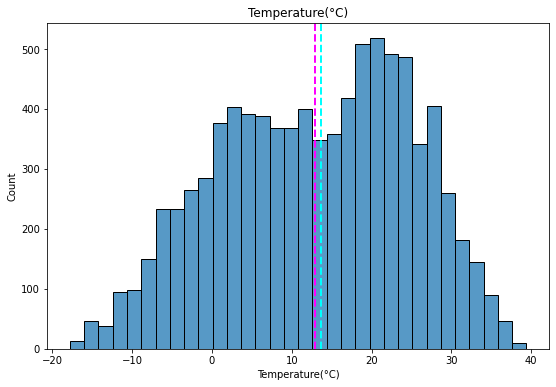

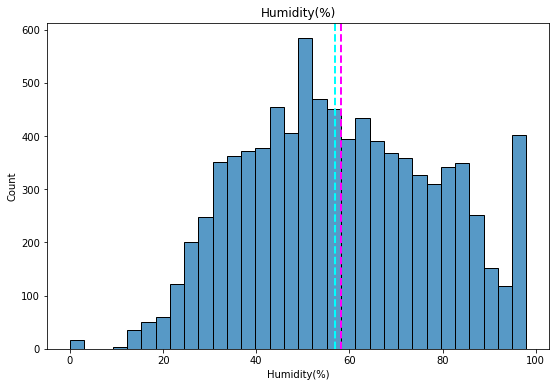

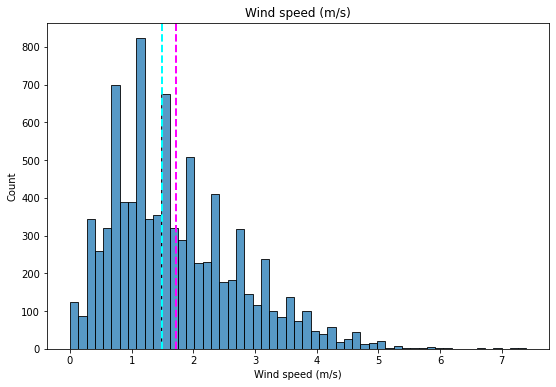

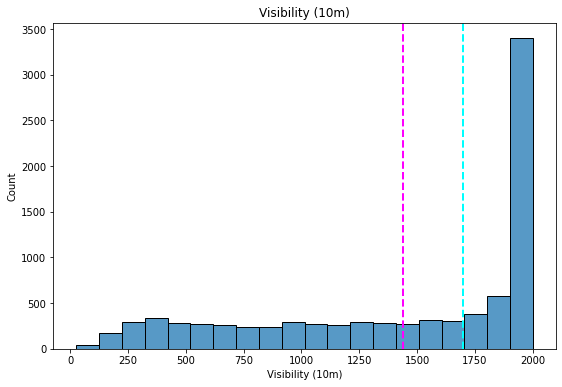

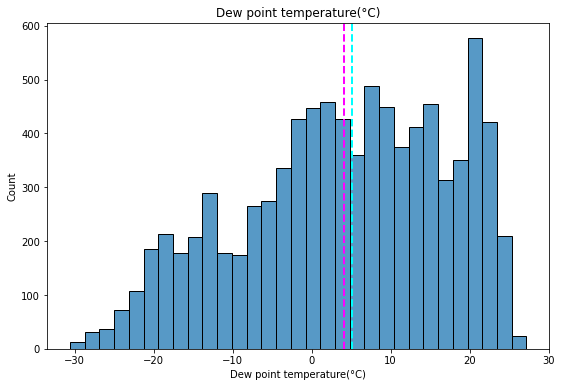

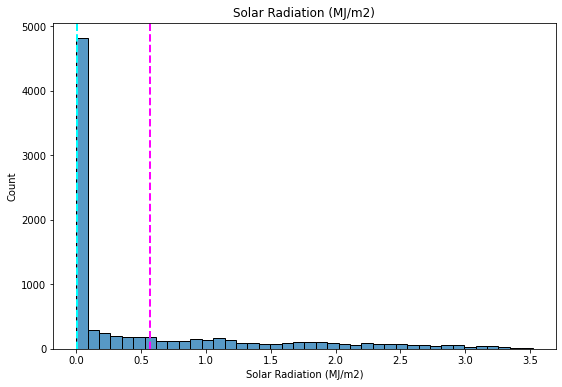

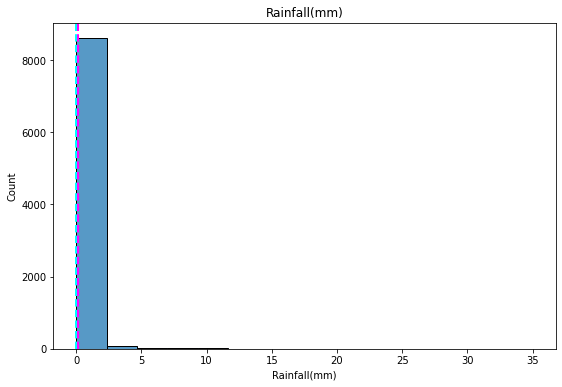

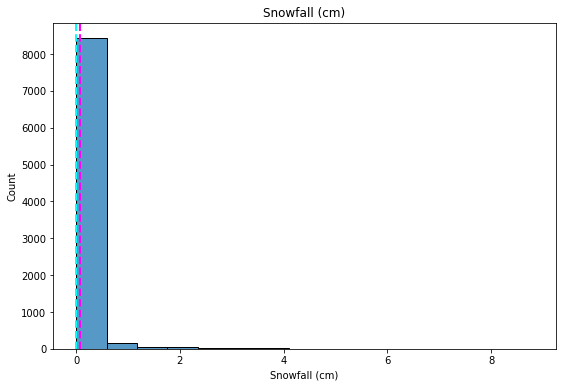

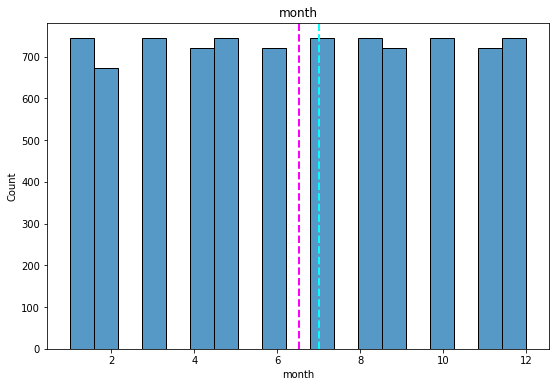

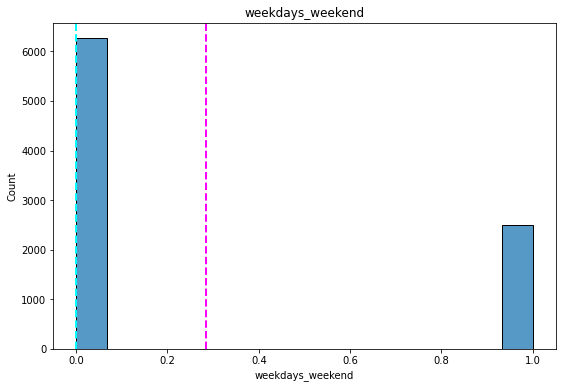

In [343]:
for col in numeric_features[0:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = ds[col]
  sns.histplot(feature)
    #feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()



here visibility is left skewed and solar radiation is right skewed. need to deal with out-lires.

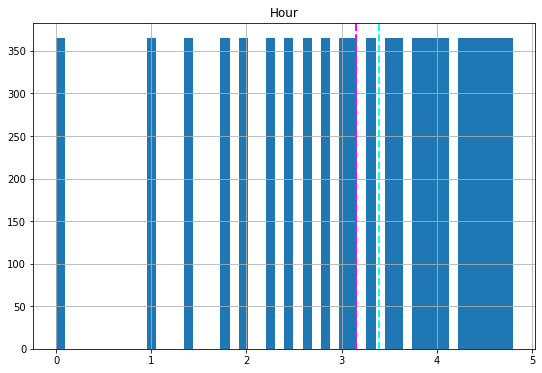

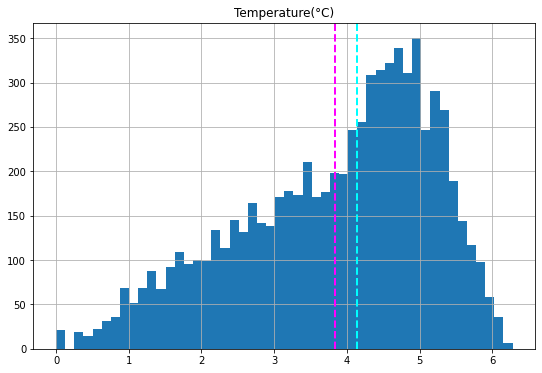

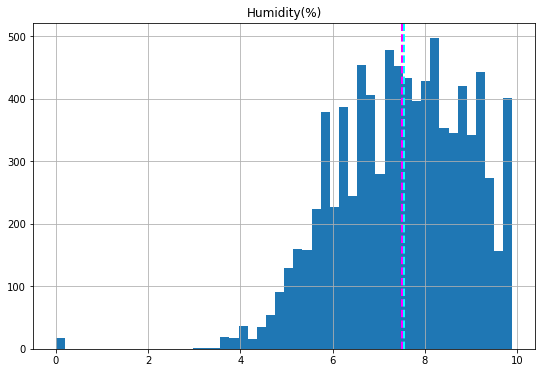

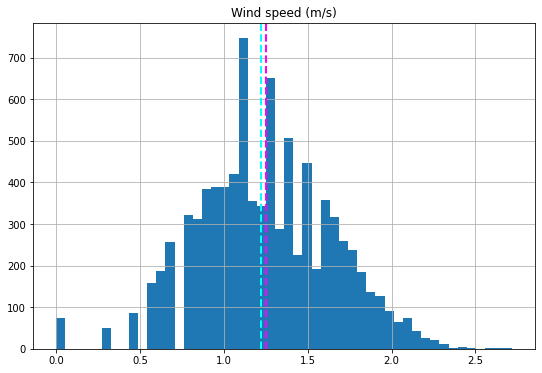

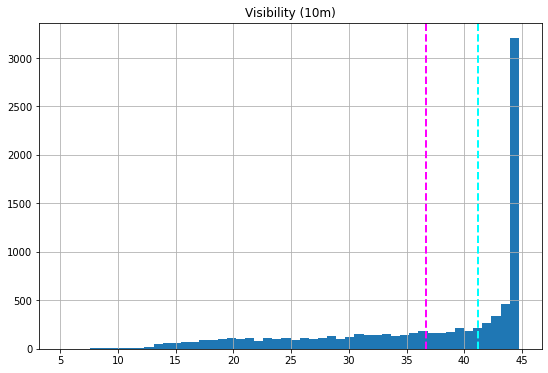

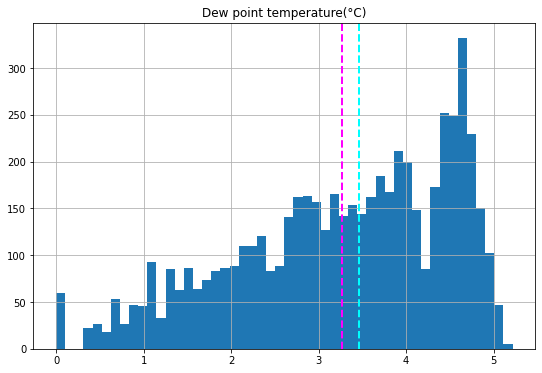

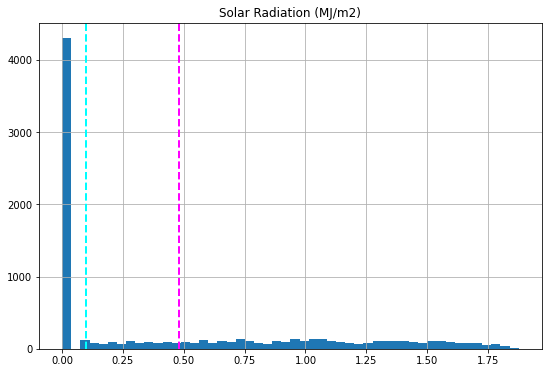

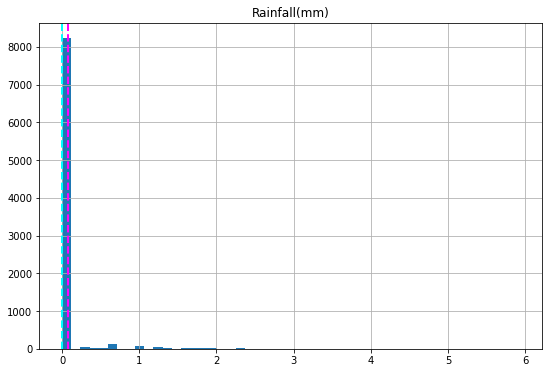

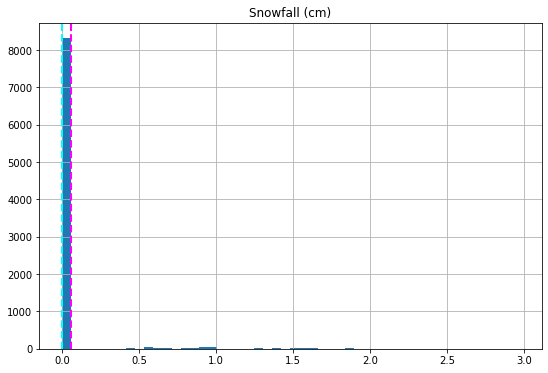

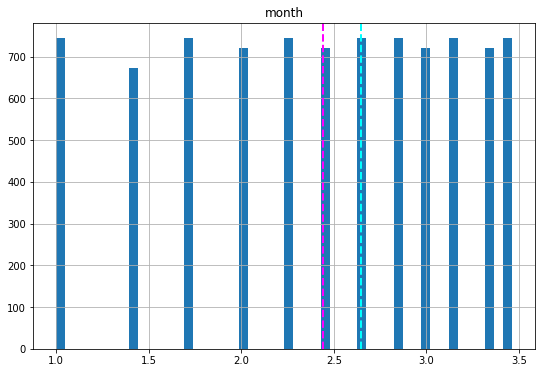

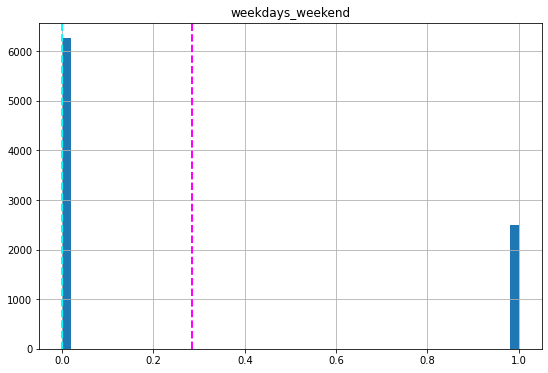

In [344]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(ds[col])
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [345]:
#not given bike in winter,plt.autumn
#functioning day no or yes


#Visual representation of categorical features

In [346]:
categorical_features = ds.describe(include=['object']).columns

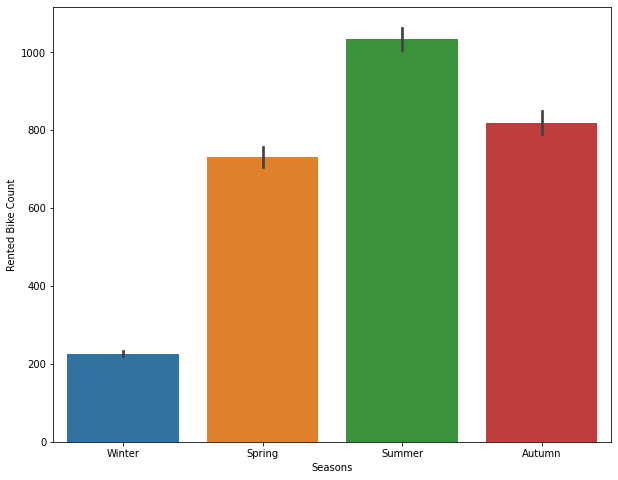

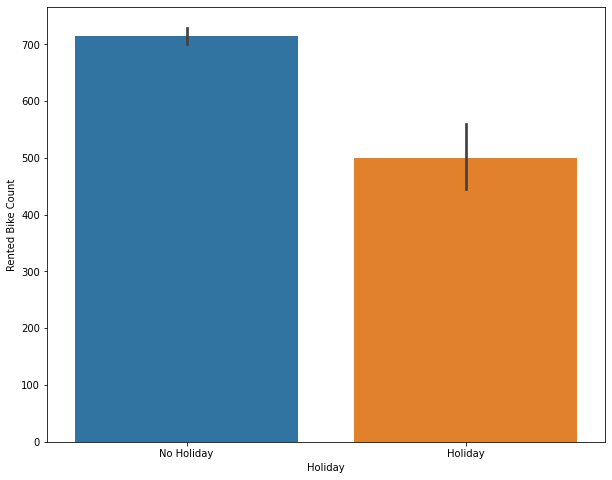

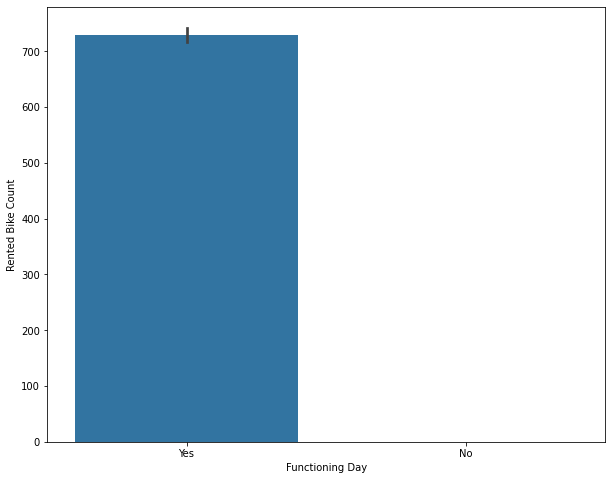

In [369]:
#graphical representation of categorical features
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=ds[col],y=ds["Rented Bike Count"])
  plt.show()

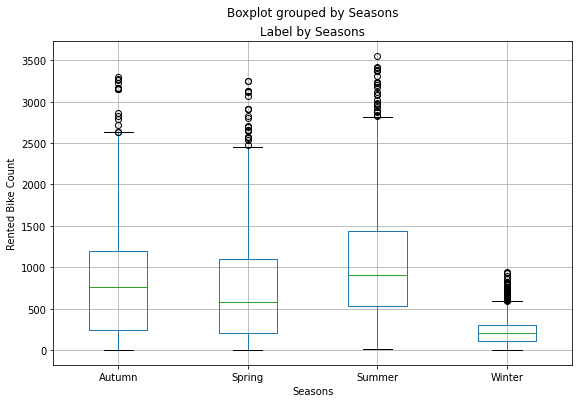

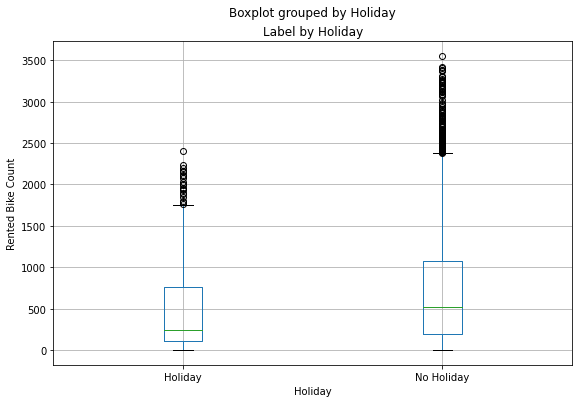

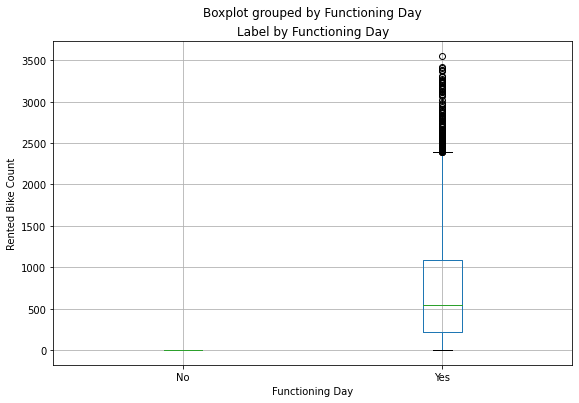

In [348]:
#checking for outliers
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    ds.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [349]:
ds.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [350]:
ds.groupby(['Seasons'])['Rented Bike Count'].count()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Rented Bike Count, dtype: int64

In [351]:
len(ds.loc[ds['Rented Bike Count']==0])

295

In [352]:
ds1 = ds.loc[ds['Rented Bike Count']==0]

In [353]:
len(ds.loc[ds['Rented Bike Count']>0])

8465

In [354]:
ds2 = ds.loc[ds['Rented Bike Count']>0]

#Bivariate analysis

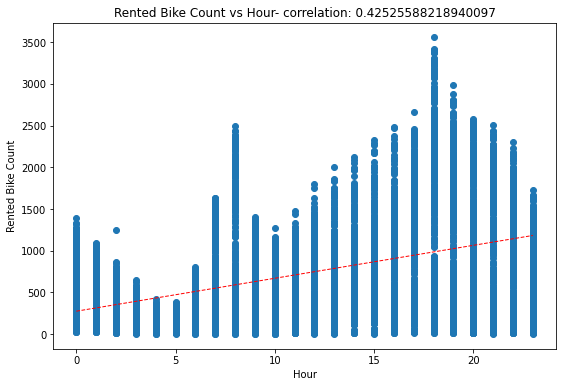

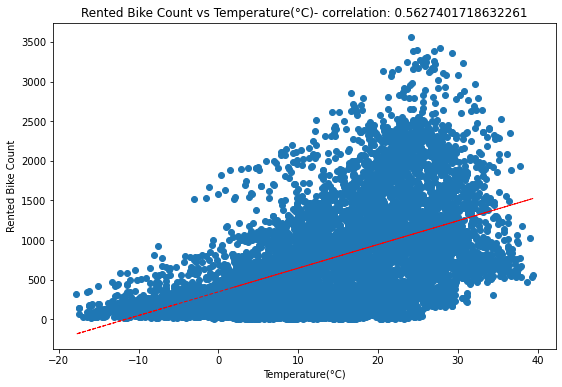

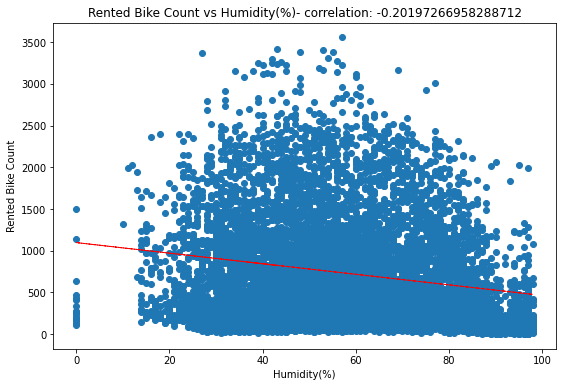

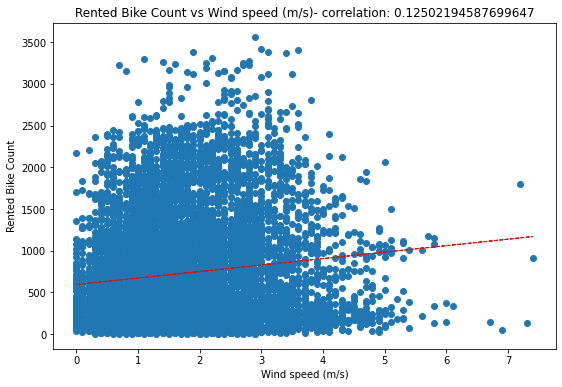

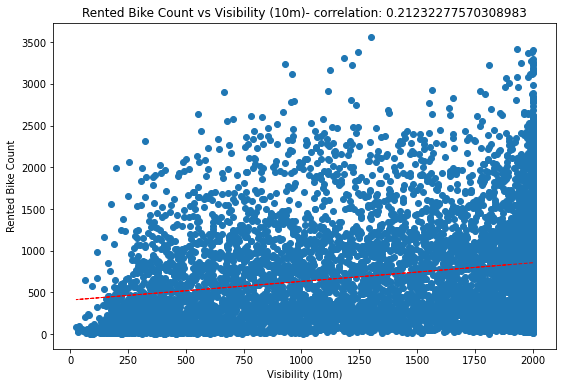

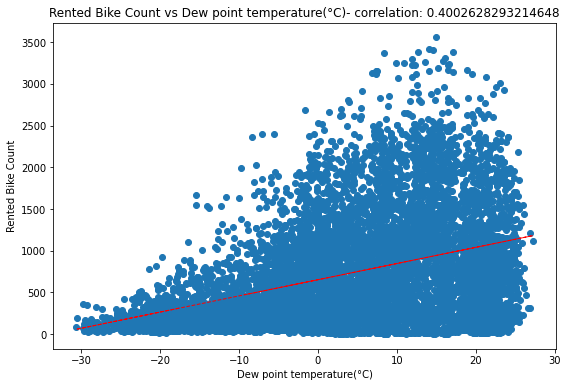

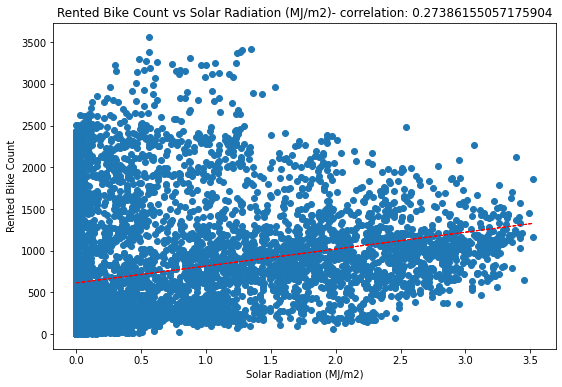

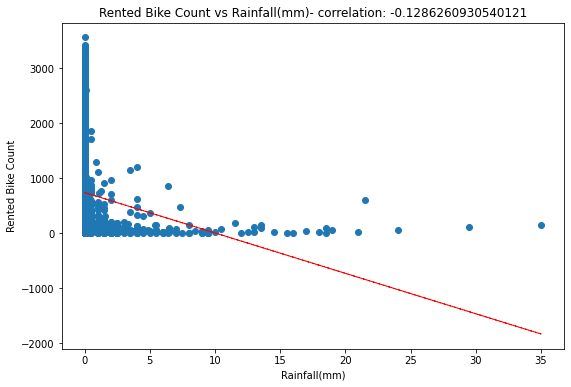

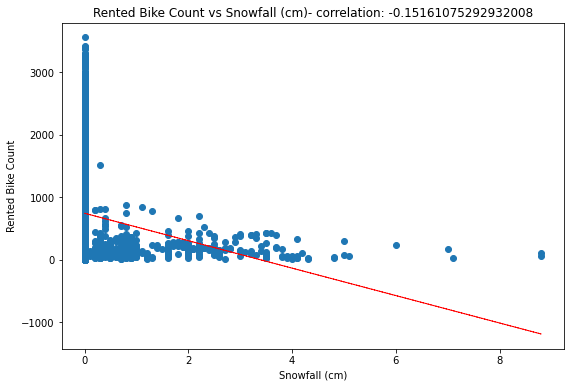

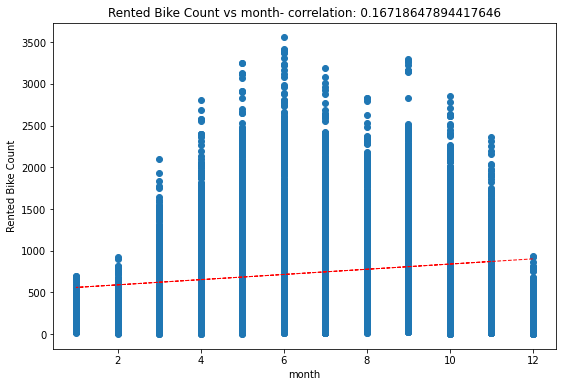

In [355]:
#finding correlation of bike count with other features
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = ds2[col]
    label = ds2['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(ds2[col], ds2['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(ds2[col])

    plt.plot(ds2[col], y_hat, "r--", lw=1)

plt.show()

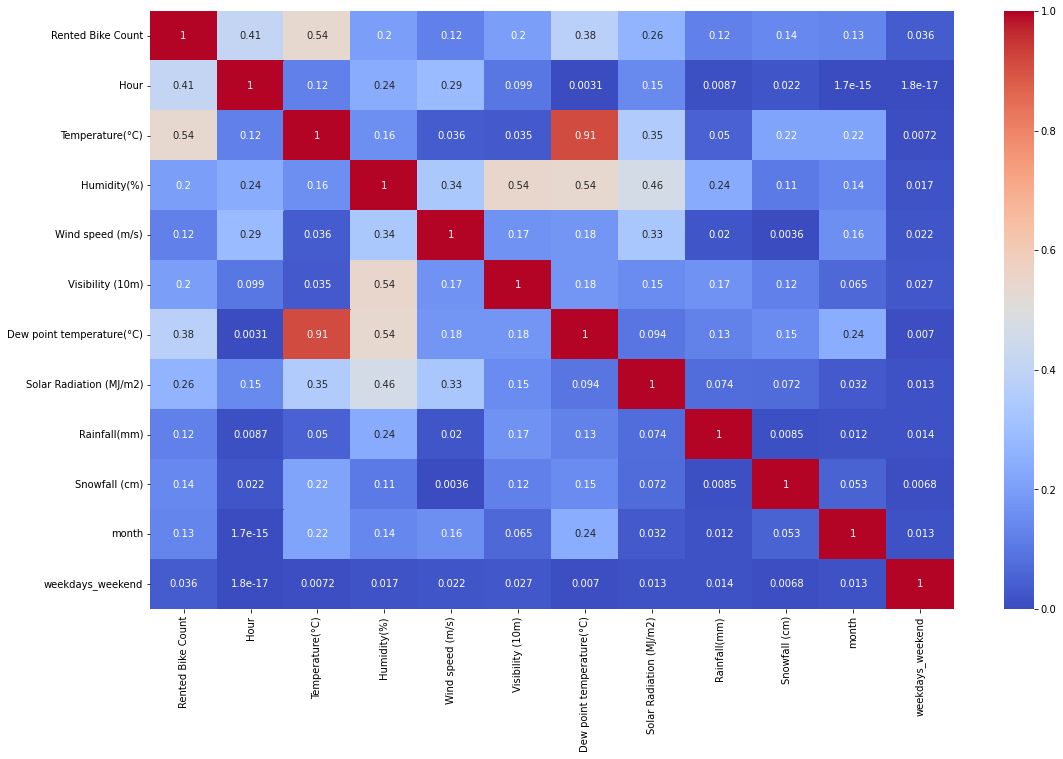

In [356]:
#correlation in a glance
plt.figure(figsize=(18,11))
correlation = ds.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [357]:
ds.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

#Feature Engineering part-2

In [358]:
#ds['adj_temp'] = 0.6*ds['Temperature(°C)']+0.4*ds['Dew point temperature(°C)']

In [359]:
ds = ds.drop(['Humidity(%)','Dew point temperature(°C)'],axis=1)

In [360]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [361]:
calc_vif(ds[[i for i in ds.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,3.929274
1,Temperature(°C),2.794584
2,Wind speed (m/s),4.281113
3,Visibility (10m),5.280633
4,Solar Radiation (MJ/m2),1.912107
5,Rainfall(mm),1.046907
6,Snowfall (cm),1.094804
7,month,4.082794
8,weekdays_weekend,1.353591


In [362]:
ds.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'month', 'weekdays_weekend'],
      dtype='object')

In [363]:
ds['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [364]:
ds['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [365]:
### Data encoding
#label encoding
encoders_nums = {"Seasons":{"Spring":1,"Summer":2,"Autumn":3,"Winter":4},
                 "Holiday":{"No Holiday":1,"Holiday":0},
                 "Functioning Day":{"Yes": 1, "No": 0},
                 }

dataset_pr = ds.replace(encoders_nums)


In [366]:
# One hot encoding
#dataset_pr = pd.get_dummies(dataset_pr, columns=["Seasons"], prefix=["body"])

In [367]:
dataset_pr

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,4,1,1,12,0
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,4,1,1,12,0
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,4,1,1,12,0
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,4,1,1,12,0
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,4,1,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,0.0,3,1,1,11,0
8756,764,20,3.4,2.3,2000,0.0,0.0,0.0,3,1,1,11,0
8757,694,21,2.6,0.3,1968,0.0,0.0,0.0,3,1,1,11,0
8758,712,22,2.1,1.0,1859,0.0,0.0,0.0,3,1,1,11,0


In [368]:
dataset_pr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80
Seasons,8760.0,2.490411,1.116831,1.0,1.00,2.00,3.00,4.00
Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
